In [ ]:
import kagglehub
lucamorn_higher_education_predictors_of_student_retention_path = kagglehub.dataset_download('lucamorn/higher-education-predictors-of-student-retention')

print('Data source import complete.')


Data source import complete.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


The following code explores how **classification** method could be apply in Machine Learning. Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data. In this method, the model is fully trained using the training data, and it is evaluated on test data before being used to perform prediction on new unseen data.

The code is divided in 5 steps to make it simple and easier to understand. These are:
1. Load the packages required for executing the code and the data
2. Data Preprocessing
3. Exploratory Data Analysis
4. Split the data into training and test sets
5. Building the classification models

### Improvements
- Different feature analysis: correlation between features and VIF evaluation
- Change in splitting the dataset (parameter *stratify*)
- Plot representing the proportions of the training and test set
- New metrics to assess the models: F1 Score (%), Precision and Recall
- Bar plot showing the performance of each model: Correct VS Incorrect classified instances
- Plot evaluating the performance during hyperparameter tuning
- Final explanation comparing results

# **1st Step: Load the packages required for executing the code and the data**

The functions and packages are loaded at the beginning and all of them are commonly used in data analysis and machine learning tasks.
- Matplotlib is a library for creating static, animated, and interactive visualizations.
- Seaborn is another data visualization library that is built on top of Matplotlib. It provides a high-level interface.
- Plotly Express is a part of the Plotly library and is used for creating interactive and expressive data visualizations.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV # function used for splitting a dataset into training and testing sets.
                                                                   # method for performing hyperparameter tuning or optimization for machine learning models

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score # function used to calculate the accuracy of a classification model's predictions.
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

The data used for the task has been designed to predict students' dropout and academic success. This is done by investigating the impact of social and economic factors.
The dataset provides a comprehensive view of students enrolled in various undergraduate degrees offered at a higher education institution. It includes demographic data, social-economic factors and academic performance information that can be used to analyze the possible predictors of student dropout and academic success.

This dataset with 37 variables and 4424 rows, contains multiple disjoint databases consisting of relevant information available at the time of enrollment, such as application mode, marital status, course chosen and more. Additionally, this data can be used to estimate overall student performance at the end of each semester by assessing curricular units credited/enrolled/evaluated/approved as well as their respective grades. Finally, we have unemployment rate, inflation rate and GDP (Grross Domestic Product) from the region which can help us further understand how economic factors play into student dropout rates or academic success outcomes. This powerful analysis tool will provide valuable insight into what motivates students to stay in school or abandon their studies for a wide range of disciplines such as agronomy, design, education, nursing, journalism, management, social service or technologies.

In [5]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("lucamorn/higher-education-predictors-of-student-retention")

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_path = os.path.join(path, filename)
        break  # Stop searching once the CSV file is found

# Read the CSV file
dataset = pd.read_csv(csv_path, sep=';')

# Dimensions of the dataframe
dimensions = dataset.shape
print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])

# The first 5 rows of the dataset
dataset.head()

Number of rows: 4424
Number of columns: 37


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# **2nd Step: Data Preprocessing**

Data preprocessing in machine learning is the set of tasks and techniques performed on a dataset before it is used to train a machine learning model. It aims to prepare the data in a format that is suitable for the chosen machine learning algorithm, ensuring that the data is clean, consistent, and appropriately structured for analysis.

## Handling null and missing values
Find **null or missing values** in the dataset. This is one of the first steps in data preprocessing since missing data can be problematic for machine learning models. Two of the most common techniques for handling missing values are:
* Imputation. Filling in missing values with a calculated or estimated value (e.g., mean, median, mode) based on the available data.
* Removal. Removing rows or columns with a significant number of missing values if they can't be imputed reliably.

There are no null or missing values in the dataset, so no modifications are required.

In [6]:
# Find missing values
null_values = dataset.isnull().sum()

# Find null values
missing_df = pd.DataFrame({'Missing values': null_values, 'Null values': dataset.isna().sum()})

# Show the number of missing and null values in each feature
#print(missing_df)

## Encoding the target column
**Encode** the target column, since it is the only non-numeric field in the dataset. Machine learning algorithms typically work with numeric data, so categorical variables (non-numeric) need to be encoded. There are different options that can be applied, such as Label Encoding or One-Hot Encoding. In this case, Label Encoding is the selected one and it consists on assigning a unique numerical label to each category in a categorical variable.

There are 3 different values and they are going to be replaced by:
* Dropout - 0
* Enrolled - 1
* Graduate - 2

map()* method is used intead of LableEncoder() since the number of values is low (just 3 possibilities).

In [7]:
print(dataset["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [8]:
dataset['Target'] = dataset['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

print(dataset["Target"].unique())

[0 2 1]


## Features analysis
We have 37 features and we have to consider removing several of them to mitigate multicollinearity. Moreover, some may be irrelevant for the classification models. To identify them we are going to plot a heatmap where the correlation between each pair of features is seen. Since we have a large number of features and we just want to focus on pairs with particularly high correlation, we are going to filter and print only the pairs with a correlation above a certain threshold. Additionally, we are going to use the Variance Inflation Factor (VIF) to detect multicollinearity.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


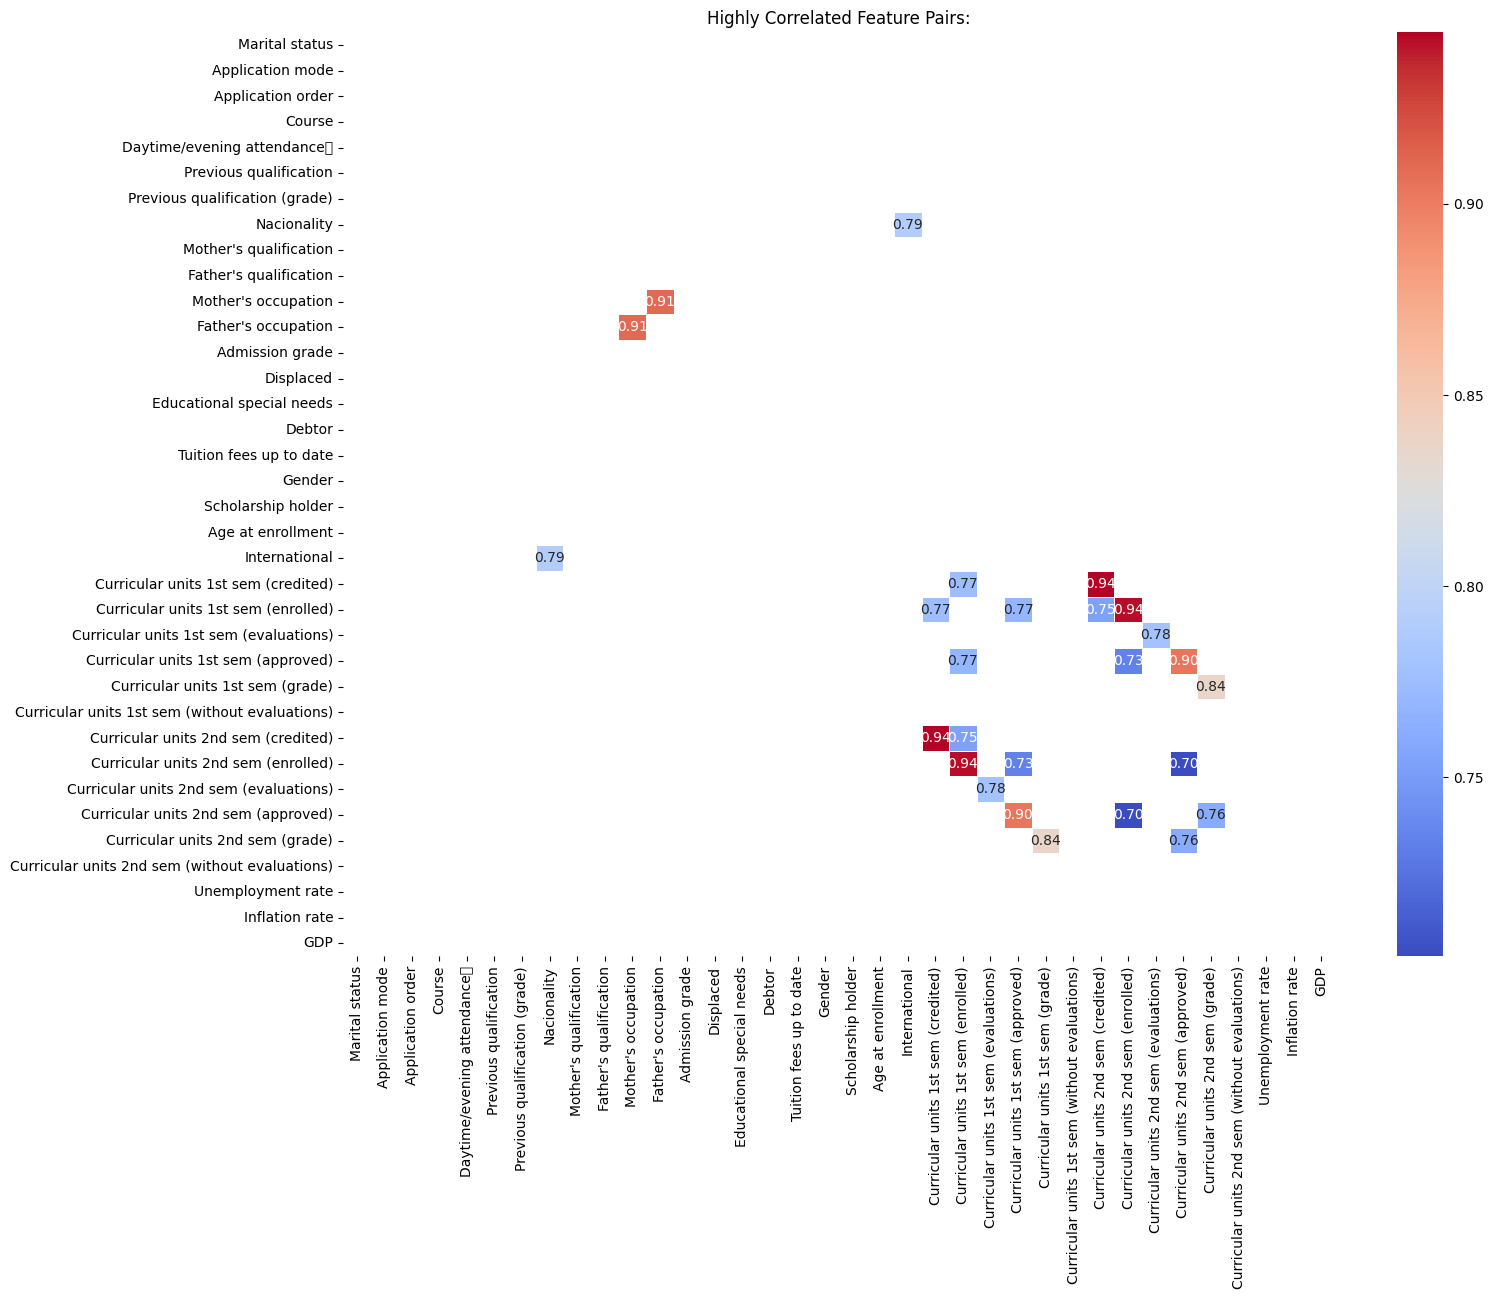

In [9]:
# Assuming X contains all your features (excluding the target variable 'Target')
X = dataset.drop('Target', axis=1)

# Calculate the correlation matrix between features
feature_correlation_matrix = X.corr()

# Set a correlation threshold (adjust as needed)
correlation_threshold = 0.7

# Filter pairs with correlation above the threshold
highly_correlated_pairs = feature_correlation_matrix[(feature_correlation_matrix > correlation_threshold) & (feature_correlation_matrix < 1.0)]

# Print highly correlated feature pairs
plt.figure(figsize=(16, 12))
sns.heatmap(highly_correlated_pairs, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Highly Correlated Feature Pairs:')
plt.show()

The association between 'International' and 'Nacionality' implies that students with international status often align with specific nationalities, reflecting a potential link between international enrollment and specific regions of origin. Meanwhile, the remarkably high positive correlations between curricular units in different semesters—credited, enrolled, and approved—underscore the consistency in academic performance across time. This suggests that students excelling or enrolling heavily in one semester tend to exhibit similar patterns in subsequent semesters. Furthermore, the moderate positive correlations between enrolled units in the 2nd semester and approved units in the 1st semester, as well as between grades in different semesters, emphasize the continuity of academic achievement.

In [10]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                                           Feature         VIF
0                                   Marital status    6.820147
1                                 Application mode    3.886030
2                                Application order    3.322073
3                                           Course   41.129647
4                     Daytime/evening attendance\t   11.716339
5                           Previous qualification    1.586275
6                   Previous qualification (grade)  129.826257
7                                      Nacionality    2.892292
8                           Mother's qualification    3.950031
9                           Father's qualification    4.497412
10                             Mother's occupation    6.999383
11                             Father's occupation    7.094308
12                                 Admission grade  116.617629
13                                       Displaced    2.827814
14                       Educational special needs    1

VIF measures the degree of multicollinearity between a particular independent variable and the other independent variables in the dataset. A high VIF indicates that a feature is highly correlated with other features, potentially leading to issues like inflated standard errors and reduced interpretability in linear regression models.

The results obtained are:
- **High VIF Values (Above 10)**: Features such as 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', and 'Admission grade' have exceptionally high VIF values, exceeding the commonly accepted threshold of 10. This suggests a significant degree of multicollinearity in these features, indicating that they might contain redundant information or are highly correlated with other predictors.
- **Moderate VIF Values (Between 5 and 10)**: Features like 'Marital status', 'Course', 'Daytime/evening attendance', 'Mother's occupation', 'Father's occupation', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)', and 'Unemployment rate' have moderate VIF values. While not alarming, these values suggest a moderate degree of correlation between these features and others in the dataset.
- **Low VIF Values (Below 5)**: Features like 'Previous qualification', 'Educational special needs', 'Gender', 'Scholarship holder', 'Debtor', 'Inflation rate', 'GDP', and others have low VIF values, indicating relatively low multicollinearity with other features.

Not all the variables identified to be potentially removed should be eliminated. The ones we are going to delete since they provide almost the same information as others features  are: 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Admission grade' and 'Unemployment rate'.

In [11]:
new_dataset = dataset.copy()
new_dataset = new_dataset.drop(columns=['Curricular units 1st sem (enrolled)',
                                        'Curricular units 2nd sem (enrolled)',
                                        'Curricular units 1st sem (grade)',
                                        'Curricular units 2nd sem (grade)',
                                        'Admission grade',
                                        'Unemployment rate'], axis=1)
#new_dataset.info()

# **3rd Step: Exploratory Data Analysis (EDA)**

In this essential step, data visualization techniques are applied to gain insights, discover patterns, and understand the underlying structure of a dataset. Common tools and techniques used in EDA include histograms, bar charts, box plots, bar charts, and more.

It is very important to know how the classes are distributed in the target column: how many dropouts, enrrolled and graduates are there (numerically and graphically).

In [12]:
new_dataset['Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


This distribution provides insights into the imbalance of classes within the target variable. Class 2 (Enrrolled) is the most prevalent class with 2209 instances, while Class 0 (Dropout) and Class 1 (Graduate) have fewer instances with 1421 and 794, respectively. Imbalanced class distributions can impact the performance of machine learning models, as they may tend to favor the majority class during training.

In [13]:
x = new_dataset['Target'].value_counts().index
y = new_dataset['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target',
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

# **4th Step: Split the data into training and test sets**

In this case, the proportion of the data that is going to be allocated to the testing set is 20%. The graphical visualisation is here below. Since the dataset is imbalanced (see the previous step) when splitting, we add the parameter stratify to indicate that the class distribution in the original dataset is preserved in the training and testing sets.

In [14]:
X = new_dataset.drop('Target', axis=1) # removing the 'Target' column from the new_dataset DataFrame.
y = new_dataset['Target'] # y represents the target variable.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

# X_train: This variable will contain the training data for the features (X).
# X_test: This variable will contain the testing data for the features (X).
# y_train: This variable will contain the training data for the target variable (y).
# y_test: This variable will contain the testing data for the target variable (y).

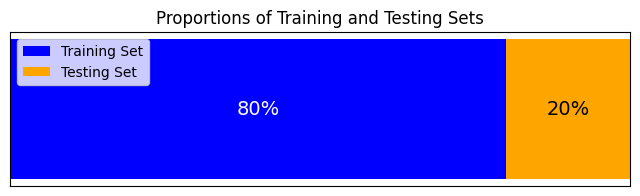

In [15]:
# Calculate the proportions
train_proportion = len(y_train) / len(y)
test_proportion = len(y_test) / len(y)

# Plotting
fig, ax = plt.subplots(figsize=(8, 2))  # Adjusting the height of the figure

# Plot the stacked bar
bars = ax.barh(['Dataset Split'], [train_proportion], color='blue', label='Training Set')
bars += ax.barh(['Dataset Split'], [test_proportion], left=train_proportion, color='orange', label='Testing Set')

# Add label with proportions
ax.text(train_proportion / 2, 0, f'{train_proportion*100:.0f}%', ha='center', va='center', color='white', fontsize=14)  # Adjusting the fontsize

# Add label for the test set
ax.text(train_proportion + test_proportion / 2, 0, f'{test_proportion*100:.0f}%', ha='center', va='center', color='black', fontsize=14)

# Customize plot appearance
ax.set_xlim(0, 1)
ax.set_xticks([])  # Removing x-axis ticks
ax.set_yticks([])  # Removing y-axis ticks
ax.legend()

plt.title('Proportions of Training and Testing Sets')
plt.show()

# **5th Step: Building the classification models**

Four classifiers are applied to this data:

## **Explanation**

### Decision Tree Classifier

DecisionTreeClassifier constructs a tree-like model of decisions and their consequences. It splits the dataset into subsets based on the values of input features to make binary decisions at each node. The goal is to create a tree that partitions the data into classes as accurately as possible.

Arguments:

random_state=0: This argument sets the random seed to ensure reproducibility. It makes sure that the same results are obtained each time you run the classifier, which can be helpful for debugging and comparing different models.

### Support Vector Classifier

Support Vector Machines (SVMs) are powerful classification algorithms that find a hyperplane (or multiple hyperplanes in the case of non-linear kernels) that best separates data points of different classes. SVC, with a 'linear' kernel, focuses on linearly separable data. It finds the hyperplane that maximizes the margin between classes.

Arguments:

- kernel='linear': This specifies the kernel function used in the SVM. In this case, 'linear' indicates a linear kernel, which is suitable for linearly separable data.
- probability=True: Setting this argument to True allows the SVM model to provide class probability estimates in addition to class predictions. It's useful for tasks that require probability scores, such as ROC curve analysis.

### Random Forest Classifier

RandomForestClassifier is an ensemble learning method that combines multiple decision trees to improve prediction accuracy. Each decision tree is constructed using a random subset of the data and a random subset of the features. The final prediction is made by aggregating the predictions of individual trees (e.g., through majority voting).

Arguments:

random_state=2: Similar to the random_state argument in the DecisionTreeClassifier, this argument sets the random seed for reproducibility. It ensures consistent results when using random processes within the algorithm.

### Ada Boost Classifier

AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak learners (usually decision trees) sequentially. It assigns higher weights to misclassified instances, forcing the subsequent weak learners to focus more on the misclassified data. It iteratively builds a strong classifier by combining the weighted votes of weak learners.

Arguments:

- n_estimators=50: This argument specifies the number of weak learners (decision trees) to be used in the ensemble. Increasing the number of estimators can make the model more robust but may also increase training time.
- learning_rate=1: The learning rate shrinks the contribution of each weak learner in the ensemble. A higher learning rate means each weak learner has more influence.
- random_state=0: As with the other classifiers, this argument sets the random seed for reproducibility in AdaBoost's internal processes.

In [16]:
dtree = DecisionTreeClassifier(random_state=0)
svm_classifier = SVC(kernel='linear', probability=True, random_state=0)  # Rename the SVM instance
rfc = RandomForestClassifier(random_state=2)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)

In [17]:
dtree.fit(X_train,y_train)
svm_classifier.fit(X_train, y_train)
rfc.fit(X_train,y_train)
abc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(learning_rate=1, random_state=0)

## **Evaluation: Accuracy and F1 score**

Let's evaluate the accuracy of the different machine learning classifiers on the test dataset (X_test) and compare their performance. The accuracy is calculated as the percentage of correctly predicted labels (y_pred) compared to the actual labels (y_test).Moreover, we will evaluate the F1 score as well, a commonly used metric, especially for imbalanced datasets. It is the harmonic mean of precision and recall (also calculated).

In [18]:
# Create an empty list to store results
results_list = []

# Decision Tree Classifier
y_pred = dtree.predict(X_test)
accuracy_dt = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_dt = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
results_list.append({'Classifier': 'Decision Tree Classifier', 'Accuracy (%)': accuracy_dt, 'F1 Score (%)': f1_dt,
                     'Precision': precision_dt, 'Recall': recall_dt})

# Support Vector Classifier
y_pred = svm_classifier.predict(X_test)
accuracy_svm = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_svm = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
results_list.append({'Classifier': 'Support Vector Classifier', 'Accuracy (%)': accuracy_svm, 'F1 Score (%)': f1_svm,
                     'Precision': precision_svm, 'Recall': recall_svm})

# Random Forest Classifier
y_pred = rfc.predict(X_test)
accuracy_rfc = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_rfc = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
precision_rfc = precision_score(y_test, y_pred, average='weighted')
recall_rfc = recall_score(y_test, y_pred, average='weighted')
results_list.append({'Classifier': 'Random Forest Classifier', 'Accuracy (%)': accuracy_rfc, 'F1 Score (%)': f1_rfc,
                     'Precision': precision_rfc, 'Recall': recall_rfc})

# Ada Boost Classifier
y_pred = abc.predict(X_test)
accuracy_abc = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_abc = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
precision_abc = precision_score(y_test, y_pred, average='weighted')
recall_abc = recall_score(y_test, y_pred, average='weighted')
results_list.append({'Classifier': 'Ada Boost Classifier', 'Accuracy (%)': accuracy_abc, 'F1 Score (%)': f1_abc,
                     'Precision': precision_abc, 'Recall': recall_abc})

# Ensemble Voting Classifier
ens1 = VotingClassifier(estimators=[('dtree', dtree), ('svm', svm_classifier), ('rfc', rfc), ('abc', abc)], voting='soft')
ens1.fit(X_train, y_train)
y_pred = ens1.predict(X_test)
accuracy_ens1 = round(accuracy_score(y_test, y_pred) * 100, 2)
f1_ens1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
precision_ens1 = precision_score(y_test, y_pred, average='weighted')
recall_ens1 = recall_score(y_test, y_pred, average='weighted')
results_list.append({'Classifier': 'Ensemble Voting Classifier', 'Accuracy (%)': accuracy_ens1, 'F1 Score (%)': f1_ens1,
                     'Precision': precision_ens1, 'Recall': recall_ens1})

# Create the DataFrame
results_df = pd.DataFrame(results_list)

# Print the results table
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



                   Classifier  Accuracy (%)  F1 Score (%)  Precision    Recall
0    Decision Tree Classifier         68.93         69.11   0.693040  0.689266
1   Support Vector Classifier         75.25         73.59   0.731074  0.752542
2    Random Forest Classifier         78.42         77.31   0.772751  0.784181
3        Ada Boost Classifier         77.63         77.29   0.773243  0.776271
4  Ensemble Voting Classifier         74.24         73.45   0.729500  0.742373


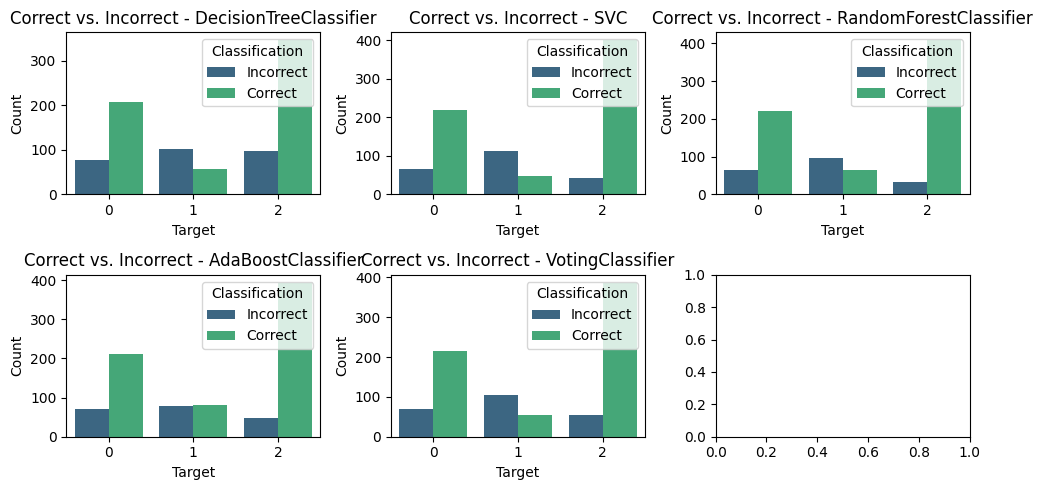

In [19]:
# List of classifiers
classifiers = [dtree, svm_classifier, rfc, abc, ens1]

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate over each classifier and plot the comparison
for i, classifier in enumerate(classifiers):
    # Predictions
    y_pred = classifier.predict(X_test)

    # Check if the predictions match the true labels
    correct_predictions = (y_pred == y_test)

    # Bar plot for correct vs. incorrect classifications
    sns.countplot(x=y_test, hue=correct_predictions, ax=axes[i], palette='viridis', dodge=True)
    axes[i].set_title(f'Correct vs. Incorrect - {classifier.__class__.__name__}')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Classification', labels=['Incorrect', 'Correct'], loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

The generated plots comparing correct and incorrect classifications for each classifier offer valuable insights into their performance, particularly regarding the prediction of class 1 (Enrolled). Notably, errors in predicting class 1 are observed across multiple classifiers, indicating potential challenges in capturing the nuances of this class.

In summary, the RandomForestClassifier achieved the highest accuracy (78.42%) and the highest F1 score (77.31) among the individual classifiers, indicating that it performed the best on this particular dataset. However, it's essential to consider other factors like model interpretability, computational resources, and the specific goals of your application when choosing a classifier for a real-world project. In order to improve the results obtained let's perform **hyperparameter tuning**. By systematically exploring different combinations of hyperparameters such as the number of trees in the forest, maximum depth of trees, and minimum samples required to split a node, we can potentially enhance the model's performance even further. This can be achieved through techniques like* GridSearchCV*, which systematically searches for the best hyperparameters by cross-validating different configurations.

## **Hyerparameter tuning**

Steps to follow when applying hyperparameter tuning:
1. **Parameter Grids Definition**: Each grid contains a set of hyperparameters and their possible values that you want to search through.

2. **GridSearchCV Objects Creation**: For each model, a GridSearchCV object is created. These objects will perform a grid search with cross-validation to find the best hyperparameters. They take the following arguments:

* The model (e.g., DecisionTreeClassifier, SVC, RandomForestClassifier, AdaBoostClassifier) with some initial hyperparameter settings.
* The parameter grid specific to the model.
* cv=5 specifies 5-fold cross-validation, meaning the data will be split into 5 parts, and the model will be trained and evaluated 5 times, each time with a different fold as the test set.
* scoring='accuracy' specifies that the accuracy metric will be used to evaluate the models.

3. **Fitting the Grid Searches**: After creating the GridSearchCV objects, they are fitted to the training data (X_train and y_train) using the fit method. This process will explore different combinations of hyperparameters for each model and evaluate their performance using cross-validation.

4. **Best Models Selection**: Once the grid searches are complete, the code extracts the best models for each type by accessing the *best_estimator_* attribute of each *GridSearchCV* object. These best models have the hyperparameters that resulted in the highest accuracy during the grid search.

5. **Model Evaluation**: Finally, the code uses the best model to make predictions on the test data (X_test) and computes the accuracy of the predictions using the *accuracy_score* function.

In [ ]:
# Define parameter grids for each model
dtree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rfc_param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

abc_param_grid = {
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create GridSearchCV objects for each model
dtree_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), dtree_param_grid, cv=5, scoring='accuracy', verbose=1)
svm_grid = GridSearchCV(SVC(kernel='linear', probability=True, random_state=0), svm_param_grid, cv=5, scoring='accuracy', verbose=1)
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=2), rfc_param_grid, cv=5, scoring='accuracy', verbose=1)
abc_grid = GridSearchCV(AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0), abc_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search objects to your training data
dtree_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)
rfc_grid.fit(X_train, y_train)
abc_grid.fit(X_train, y_train)

# Get the best models from the grid searches
best_dtree = dtree_grid.best_estimator_
best_svm = svm_grid.best_estimator_
best_rfc = rfc_grid.best_estimator_
best_abc = abc_grid.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 12 candidates, totalling 60 fits


The plots represent the results of a grid search over hyperparameter values for our different machine learning models: Decision Tree, Support Vector Machine (SVM), Random Forest, and AdaBoost. First, in the decission tree we look for the max depth value that maximizes the mean test score, indicating the optimal complexity for the Decision Tree.Second, in the SVM we identify the value of C that yields the highest mean test score, representing the optimal balance between model complexity and generalization. Third, in the random forest plot we find the number of estimators that maximizes the mean test score, demonstrating the optimal trade-off between bias and variance in the Random Forest. Finally, in the AdaBoost we determine the number of estimators that results in the highest mean test score, indicating the optimal strength of the AdaBoost ensemble.

In [ ]:
# Create dataframes with the grid search results for each model
dtree_results = pd.DataFrame(dtree_grid.cv_results_)
svm_results = pd.DataFrame(svm_grid.cv_results_)
rfc_results = pd.DataFrame(rfc_grid.cv_results_)
abc_results = pd.DataFrame(abc_grid.cv_results_)

# Plot the results for Decision Tree
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.title('Decision Tree')
plt.plot(dtree_results['param_max_depth'], dtree_results['mean_test_score'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')

# Plot the results for SVM
plt.subplot(1, 4, 2)
plt.title('SVM')
plt.plot(svm_results['param_C'], svm_results['mean_test_score'], marker='o')
plt.xlabel('C')
plt.ylabel('Mean Test Score')

# Plot the results for Random Forest
plt.subplot(1, 4, 3)
plt.title('Random Forest')
plt.plot(rfc_results['param_n_estimators'], rfc_results['mean_test_score'], marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')

# Plot the results for AdaBoost
plt.subplot(1, 4, 4)
plt.title('AdaBoost')
plt.plot(abc_results['param_n_estimators'], abc_results['mean_test_score'], marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

In [ ]:
y_pred_best_dtree = best_dtree.predict(X_test)
y_pred_best_svm = best_svm.predict(X_test)
y_pred_best_rfc = best_rfc.predict(X_test)
y_pred_best_abc = best_abc.predict(X_test)

print("Accuracy best dtree:",round(accuracy_score(y_test,y_pred_best_dtree)*100,2),"%")
print("Accuracy best svm:",round(accuracy_score(y_test,y_pred_best_svm)*100,2),"%")
print("Accuracy best rfc:",round(accuracy_score(y_test,y_pred_best_rfc)*100,2),"%")
print("Accuracy best abc:",round(accuracy_score(y_test,y_pred_best_abc)*100,2),"%")

The accuracy results for each model, both before and after hyperparameter tuning, are as follows:

**Before Hyperparameter Tuning:**
* DecisionTreeClassifier: 68.93%
* Support Vector Classifier (SVC): 75.25%
* RandomForestClassifier: 78.42%
* AdaBoostClassifier: 77.63%

**After Hyperparameter Tuning:**
* Best DecisionTreeClassifier: 76.26%
* Best Support Vector Classifier (SVC): 75.59%
* Best RandomForestClassifier: 78.53%
* Best AdaBoostClassifier: 76.27%

The accuracy of the Decision Tree Classifier increased from 68.93% to 76.26% after hyperparameter tuning. The increase is not dramatic because decision trees are relatively simple models, and the scope for improvement may be limited.

The accuracy for Support Vector Classifier (SVC) remained almost the same at 75.25% after hyperparameter tuning, and the same occurs with AdaBoost Classifier. This might happen for a few reasons. It's possible that the default hyperparameters were already close to optimal for this specific dataset, or that the dataset doesn't benefit significantly from the available hyperparameters.

Finally, we can see an slight increasement in the Random Forest Classifier accuracy: from 78.42% to 78.53%. Random forests are ensemble models that are known for their robustness, and the default hyperparameters might already yield good results. Hyperparameter tuning can still fine-tune the model, but the increase is modest because it was already performing well.

# **Conclusion**
In conclusion, the extent to which hyperparameter tuning improves model performance can vary widely based on the model type, the dataset, and the initial choice of hyperparameters. Some models might benefit significantly from tuning, while others might be close to their optimal performance with the default settings. Based on the results obtained, the computational cost and potential gains, perform hyperparameter tuning does not result in substantial gains in this specific case.